### Order in which code is to be ran

Dataset_preprocessing.ipynb --->  EDA.ipynb ---> Feature_Engineering.ipynb ---> models.ipynb ----> models.ipynb ----> neural-network.ipynb

Many Dataset files will be created in running this code could'nt submit those file of 50 mb zip file limit

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


In [13]:
import warnings
warnings.filterwarnings("ignore")


In [14]:
X=pd.read_csv('Featured_engg_dataset\\train.csv')
y_train=X['Study Recruitment Rate']
X_train=X.drop(['Study Recruitment Rate'],axis=1)

This (Study Recruitment Rate^2) was created b/c while doing poly feature engg Study Recruitment Rate was removed so it did made 2 degree poly with itself when later merged got 2 output quantity so will have to remove both its a poly feature on itself if not removed our model will perform very badly on test

In [15]:
X_train=X_train.drop(['Study Recruitment Rate^2'],axis=1)

In [16]:
X=pd.read_csv('Featured_engg_dataset\\val.csv')
y_val=X['Study Recruitment Rate']
X_val=X.drop(['Study Recruitment Rate'],axis=1)     

This (Study Recruitment Rate^2) was created b/c while doing dpoly feature engg Study Recruitment Rate was removed so it did made 2 degree poly with itself when later merged got 2 output quantity so will have to remove both its a poly feature on itself if not removed our model will perform very badly on test

In [17]:
X_val=X_val.drop(['Study Recruitment Rate^2'],axis=1)

This code performs a linear regression analysis using GridSearchCV to find the best model based on cross-validated mean squared error. It fits the model to the training data (X_train, y_train), predicts the validation data (X_val), and calculates the mean squared error (MSE), mean absolute error (MAE), and R² score for the predictions.

In [10]:
model = LinearRegression()
grid_search = GridSearchCV(model, {}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Linear Regression Results:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Linear Regression Results:
MSE: 361.1128213924294
MAE: 4.8808232645412835
R²: 0.7950536193232335


This code performs a decision tree regression analysis using GridSearchCV to find the best model parameters (max_depth) based on cross-validated mean squared error. It fits the model to the training data (X_train, y_train), predicts the validation data (X_val), and calculates the mean squared error (MSE), mean absolute error (MAE), and R² score for the predictions. 

In [ ]:
model = DecisionTreeRegressor()
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50,100,200,300,400,500]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nDecision Tree Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

This code performs a random forest regression analysis using GridSearchCV to find the best model parameters (n_estimators and max_depth) based on cross-validated mean squared error. It fits the model to the training data (X_train, y_train), predicts the validation data (X_val), and calculates the mean squared error (MSE), mean absolute error (MAE), and R² score for the predictions. 

In [ ]:
model = RandomForestRegressor()
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nRandom Forest Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


Random Forest Results:
Best Params: {'max_depth': 20, 'n_estimators': 10}
MSE: 332.57890791036795
MAE: 0.3395503415332803
R²: 0.8112477889795288


This code performs a support vector regression (SVR) analysis using GridSearchCV to find the best model parameters (C and gamma) based on cross-validated mean squared error. It fits the model to the training data (X_train, y_train), predicts the validation data (X_val), and calculates the mean squared error (MSE), mean absolute error (MAE), and R² score for the predictions. 

In [ ]:

model = SVR()
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nSupport Vector Regressor Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")



Support Vector Regressor Results:
Best Params: {'C': 10, 'gamma': 'scale'}
MSE: 1245.4261320619037
MAE: 4.068448258925487
R²: 0.29316943889685176


This code performs a k-nearest neighbors regression analysis using GridSearchCV to find the best model parameter (n_neighbors) based on cross-validated mean squared error. It fits the model to the training data (X_train, y_train), predicts the validation data (X_val), and calculates the mean squared error (MSE), mean absolute error (MAE), and R² score for the predictions. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\nK-Neighbors Regressor Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")



K-Neighbors Regressor Results:
Best Params: {'n_neighbors': 3}
MSE: 704.1219482312468
MAE: 1.6697003965268273
R²: 0.6003818300091712


This code visualizes the performance metrics (MSE, MAE, and R²) of five different regression models (Linear Regression, Decision Tree, Random Forest, SVR, and KNN) using bar plots. It creates a subplot with three bar charts, each comparing one of the metrics across the models. The charts are displayed side by side with appropriate titles, labels, and color schemes for better readability.

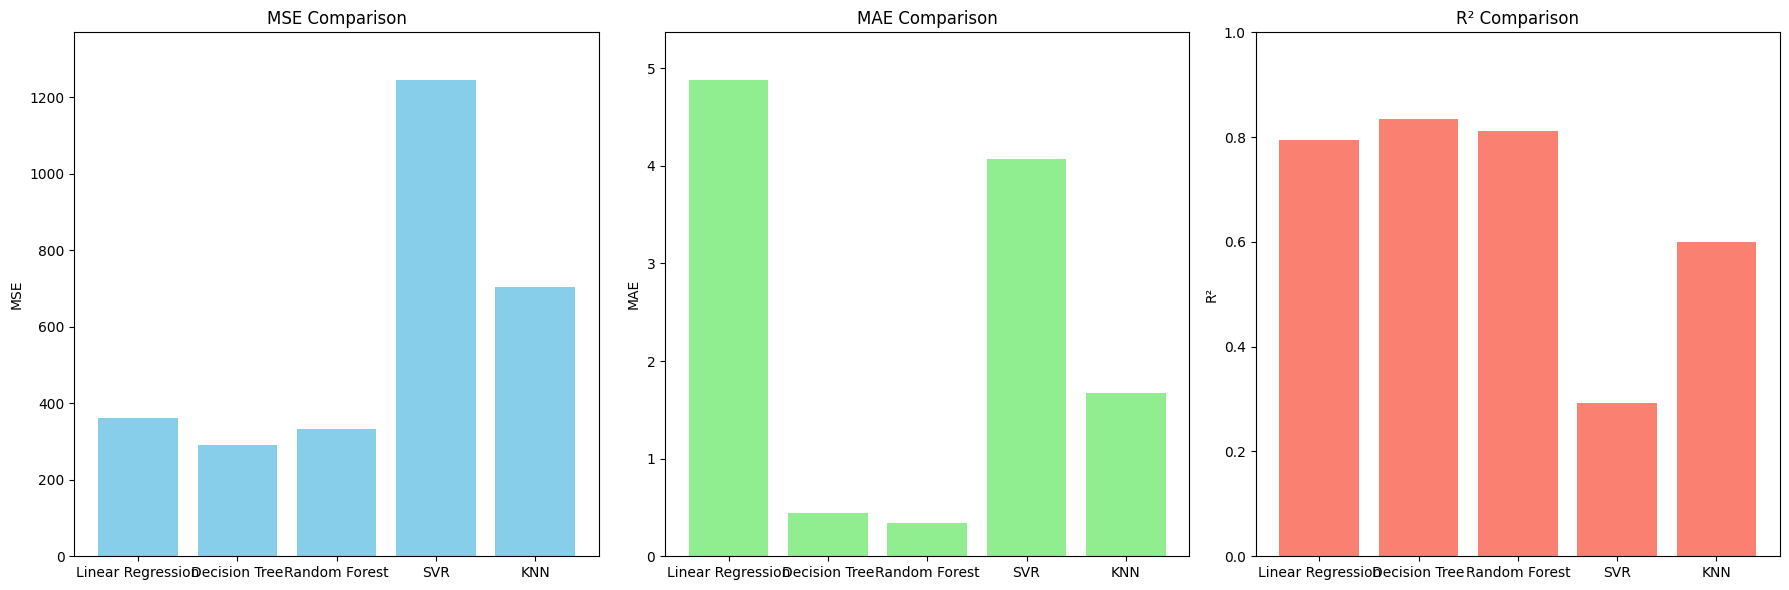

In [7]:

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']

mse = [361.11, 289.85, 332.57, 1245.43, 704.12]

mae = [4.88, 0.44, 0.34, 4.07, 1.67]

r2 = [0.795, 0.835, 0.811, 0.293, 0.600]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(models, mse, color='skyblue')
axs[0].set_title('MSE Comparison')
axs[0].set_ylabel('MSE')
axs[0].set_ylim(0, max(mse) * 1.1)

axs[1].bar(models, mae, color='lightgreen')
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')
axs[1].set_ylim(0, max(mae) * 1.1)

axs[2].bar(models, r2, color='salmon')
axs[2].set_title('R² Comparison')
axs[2].set_ylabel('R²')
axs[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()


The plots compare the performance of different models using MSE, MAE, and R² metrics. The Decision Tree and Random Forest models show lower MSE and MAE, indicating better accuracy, while SVR has the lowest R², suggesting it explains less variance. KNN performs moderately across all metrics, and Linear Regression shows balanced performance.

In [10]:
X=pd.read_csv('Featured_engg_dataset\\test.csv')
y_test=X['Study Recruitment Rate']
X_test=X.drop(['Study Recruitment Rate'],axis=1)

In [11]:
X_test=X_test.drop(['Study Recruitment Rate^2'],axis=1)

Best Non Neural Network model performance on test set

In [18]:
best_rf_model = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=42)
best_rf_model.fit(X_train, y_train)

y_test_pred = best_rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')

Test MSE: 50.512958560858934
Test MAE: 0.17554355962657028
Test R²: 0.9519620172362653
